<a href="https://colab.research.google.com/github/ASAbuSayem/The-Boston-Housing-Dataset-in-Machine-Learning/blob/main/The_Boston_Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Task 1: Loading the Dataset
# Define column names for the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/ML Assignment 2024/housing.csv',
                 header=None, delimiter=r"\s+", names=column_names)

In [ ]:
# Display first few rows to inspect the data
print("Dataset preview:")
print(df.head())

Dataset preview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Task 2: Data Exploration
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


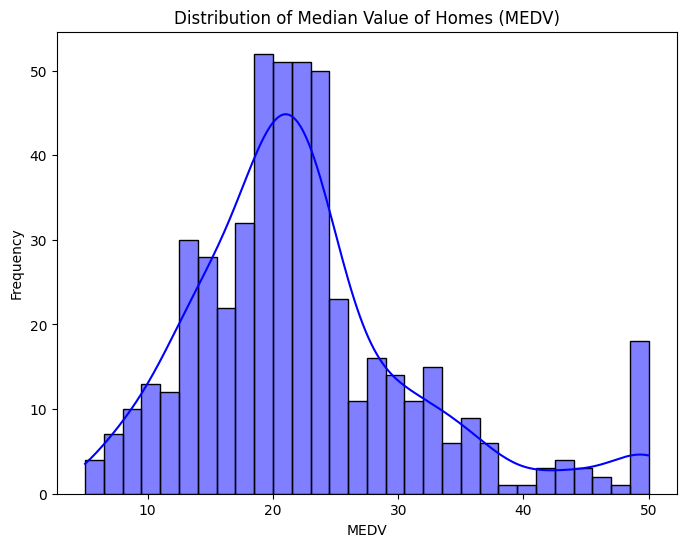

In [ ]:
# Visualize the target variable distribution (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution of Median Value of Homes (MEDV)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

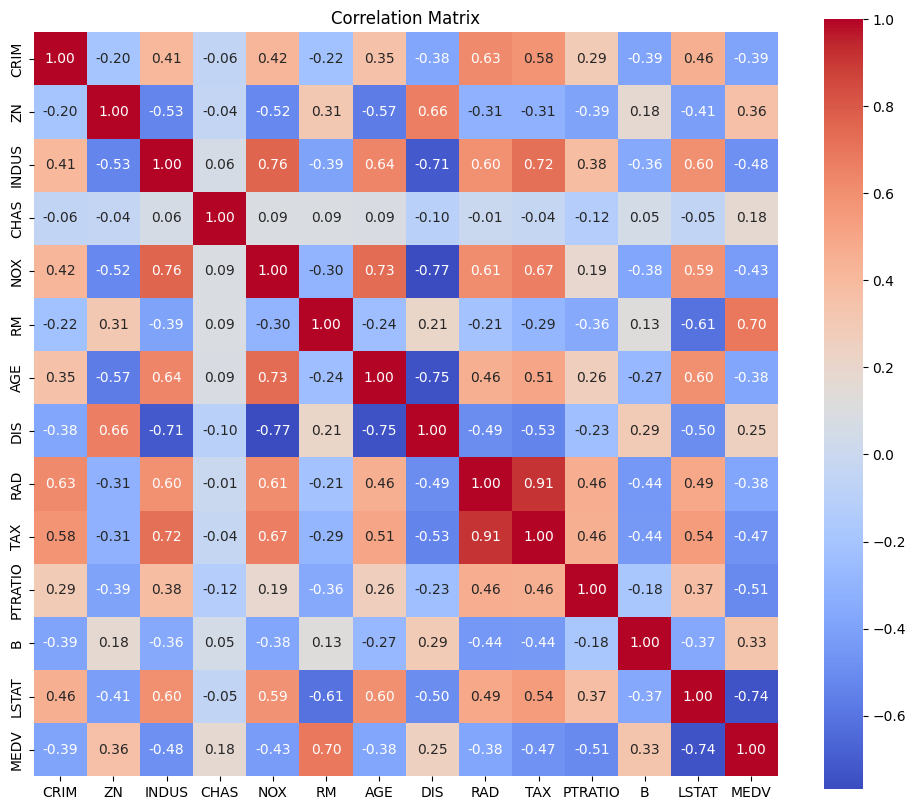

In [ ]:
# Correlation heatmap to explore relationships
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

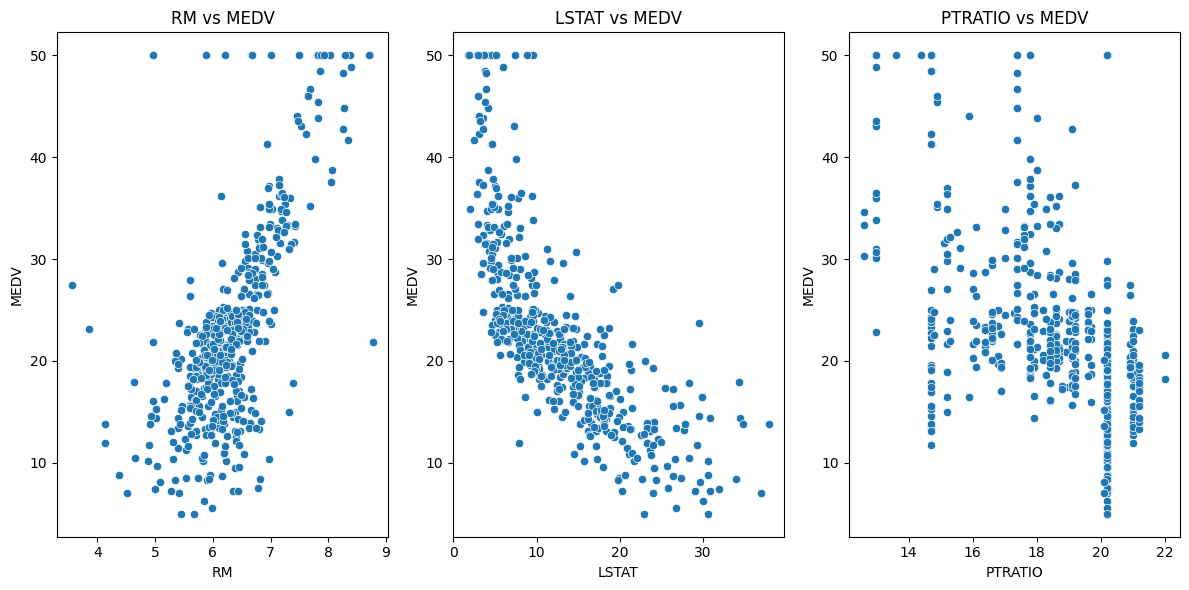

In [ ]:
# Scatter plot for a few key predictors vs MEDV
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['MEDV'])
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

In [ ]:
# Task 3: Splitting the Data
# Define features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [ ]:
# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Task 4: Model Selection & Training
# Initialize the Linear Regression model
linear_model = LinearRegression()

In [ ]:
# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Task 5: Model Evaluation
# Predict on the test set
y_pred = linear_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 21.52
Root Mean Squared Error (RMSE): 4.64
R-squared: 0.71
Adjusted R-squared: 0.68


In [ ]:
# Task 6: Feature Importance
# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)


Feature Importance (Coefficients):
    Feature  Coefficient
5        RM     4.057199
3      CHAS     3.119835
8       RAD     0.242727
2     INDUS     0.049523
1        ZN     0.035809
11        B     0.011794
9       TAX    -0.008702
6       AGE    -0.010821
0      CRIM    -0.133470
12    LSTAT    -0.547113
10  PTRATIO    -0.910685
7       DIS    -1.385998
4       NOX   -15.417061


<ipython-input-18-ee47e65b0deb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


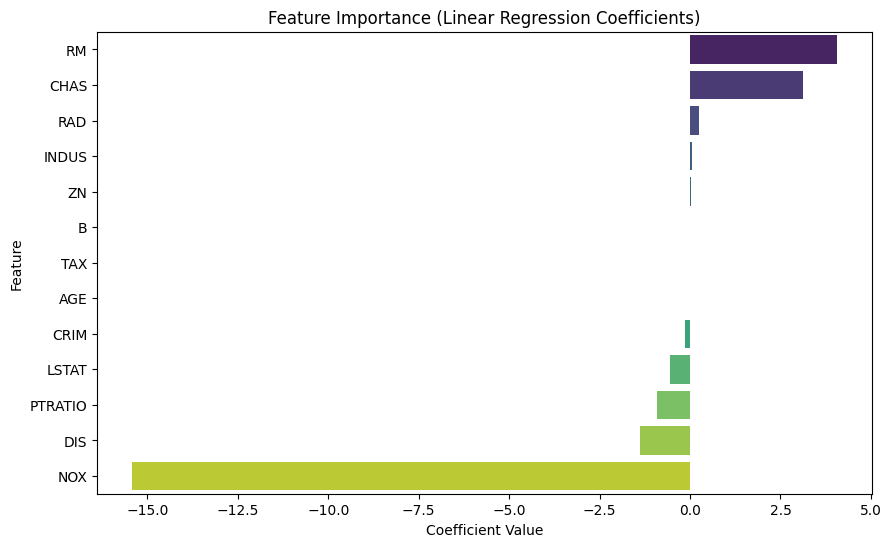

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Task 7: Improvement (Bonus)
# Apply Polynomial Features (Degree=2 for improvement)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

In [ ]:
# Evaluate the improved model
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, poly_pred)
poly_adjusted_r2 = 1 - (1 - poly_r2) * (n - 1) / (n - p - 1)

In [ ]:
print("\nImproved Model Evaluation (Polynomial Regression, Degree=2):")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"Mean Squared Error (MSE): {poly_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {poly_rmse:.2f}")
print(f"R-squared: {poly_r2:.2f}")
print(f"Adjusted R-squared: {poly_adjusted_r2:.2f}")


Improved Model Evaluation (Polynomial Regression, Degree=2):
Mean Absolute Error (MAE): 3.61
Mean Squared Error (MSE): 29.81
Root Mean Squared Error (RMSE): 5.46
R-squared: 0.60
Adjusted R-squared: 0.56


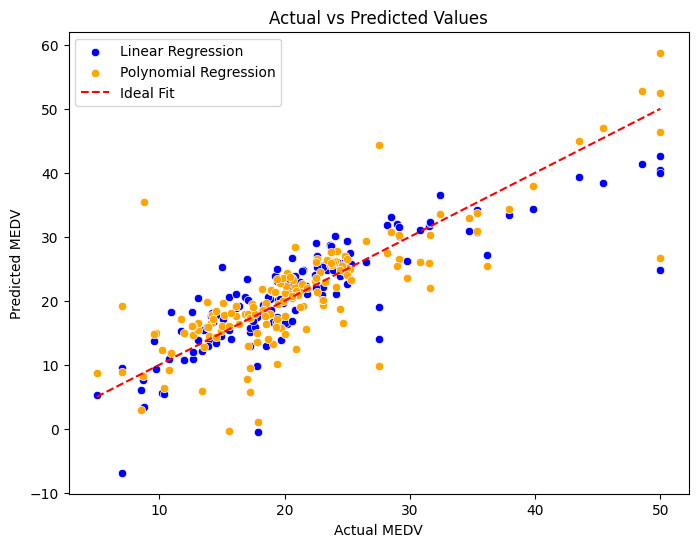

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Linear Regression')
sns.scatterplot(x=y_test, y=poly_pred, color='orange', label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.legend()
plt.show()

### *Happy Coding*